# Kate Naychuk


## Research question/interests

For this data analysis project, I have chosen to find the relationship between the genre of video game and the number of players each game allows. Is there a specific genre that leans towards multiplayer or single player? Does this relationship affect the diversity amongst popular titles? These are just some of the questions I hope to exlore. Answering these may be useful in predicting what to expect from upcoming video games or to provide the relevant information needed to create a unique product. My goal is to find out if there are any patterns, analyze them, and understand why they may occur.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r'../data/processed/games-data-processed.csv')
print(df)

                                               name      platform     r-date  \
0              The Legend of Zelda: Ocarina of Time    Nintendo64  23-Nov-98   
1                          Tony Hawk's Pro Skater 2   PlayStation  20-Sep-00   
2                               Grand Theft Auto IV  PlayStation3  29-Apr-08   
3                                       SoulCalibur     Dreamcast  08-Sep-99   
4                               Grand Theft Auto IV       Xbox360  29-Apr-08   
...                                             ...           ...        ...   
17939                        Vroom in the Night Sky        Switch  05-Apr-17   
17940           Leisure Suit Larry: Box Office Bust  PlayStation3  05-May-09   
17941                                         Yaris       Xbox360  10-Oct-07   
17942                     Ride to Hell: Retribution            PC  24-Jun-13   
17943  Family Party: 30 Great Games Obstacle Arcade          WiiU  04-Dec-12   

                    developer  \
0     

## Cleaning Data

In [3]:
# Drops the columns that are not necessary for my analysis.
df = df.drop(columns=['name','r-date', 'developer'])
# Drops the rows that are missing player information.
df = df.drop(df[df.players == 'No info'].index)
# Displays a sample of what the table looks like after cleaning
df

,platform,genre,players
0,Nintendo64,"Action Adventure,Fantasy",1 Player
1,PlayStation,"Sports,Alternative,Skateboarding",02-Jan
2,PlayStation3,"Action Adventure,Modern,Modern,Open-World",1 Player
3,Dreamcast,"Action,Fighting,3D",02-Jan
4,Xbox360,"Action Adventure,Modern,Modern,Open-World",1 Player
...,...,...,...
17936,Xbox360,"Driving,Action Adventure,Modern,Racing,General...",No Online Multiplayer
17939,Switch,"Sports,Individual,Biking",No Online Multiplayer
17940,PlayStation3,"Action Adventure,Adventure,Third-Person,Open-W...",No Online Multiplayer
17941,Xbox360,"Driving,Racing,Arcade,Arcade,Automobile",2 Online


## EDA

In [4]:
unique_genres = []

for x in df['genre']:
    x2 = x.split(',')
    for y in x2:
        if not y in unique_genres:
            unique_genres.append(y)
            
print(unique_genres)

['Action Adventure', 'Fantasy', 'Sports', 'Alternative', 'Skateboarding', 'Modern', 'Open-World', 'Action', 'Fighting', '3D', 'Platformer', 'Shooter', 'First-Person', 'Sci-Fi', 'Arcade', 'Linear', 'Horror', 'Miscellaneous', 'Compilation', 'Role-Playing', 'Action RPG', 'Western-Style', 'Driving', 'Racing', 'GT / Street', 'PC-style RPG', '2D', 'Third-Person', 'Historic', 'Adventure', 'General', 'Traditional', 'Football', 'Sim', 'Japanese-Style', 'Puzzle', 'Console-style RPG', 'Strategy', 'Turn-Based', '4X', 'Real-Time', 'Survival', 'Command', 'Snowboarding', 'Sandbox', 'Soccer', 'Kart', "Beat-'Em-Up", 'Futuristic', 'Massively Multiplayer Online', 'Massively Multiplayer', 'Simulation', 'Automobile', 'Ice Hockey', 'Rhythm', 'Music', 'Virtual Life', 'Virtual', 'Wargame', 'Team', 'Tactical', 'Tactics', 'Point-and-Click', 'Snow / Water', 'Other', 'Individual', 'Golf', 'Flight', 'Civilian', 'Formula One', 'WWII', 'Combat', 'Space', 'Small Spaceship', 'Car Combat', 'Baseball', 'Skate / Skateboa

## Processing & Wrangling

In [5]:
df['genre'] = df['genre'].str.split(',')
df = df.explode('genre')
df.head(10)

,platform,genre,players
0,Nintendo64,Action Adventure,1 Player
0,Nintendo64,Fantasy,1 Player
1,PlayStation,Sports,02-Jan
1,PlayStation,Alternative,02-Jan
1,PlayStation,Skateboarding,02-Jan
2,PlayStation3,Action Adventure,1 Player
2,PlayStation3,Modern,1 Player
2,PlayStation3,Modern,1 Player
2,PlayStation3,Open-World,1 Player
3,Dreamcast,Action,02-Jan


## Method Chaining

In [6]:
import project_functions1 as pf1

df = pf1.load_and_process(r"../data/processed/games-data-processed.csv")
df.head(10)


,platform,genre,players
0,Nintendo64,Action Adventure,1 Player
0,Nintendo64,Fantasy,1 Player
1,PlayStation,Sports,02-Jan
1,PlayStation,Alternative,02-Jan
1,PlayStation,Skateboarding,02-Jan
2,PlayStation3,Action Adventure,1 Player
2,PlayStation3,Modern,1 Player
2,PlayStation3,Open-World,1 Player
3,Dreamcast,Action,02-Jan
3,Dreamcast,Fighting,02-Jan


## Data Analysis

In [7]:
genre_count = df['genre'].value_counts()
df = df[~df['genre'].isin(genre_count[genre_count < 250].index)]

player_count = df['players'].value_counts()
df = df[~df['players'].isin(player_count[player_count < 250].index)]



[Text(0, 0.5, 'Genre of Video Game'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Number of Video Games in Each Genre')]

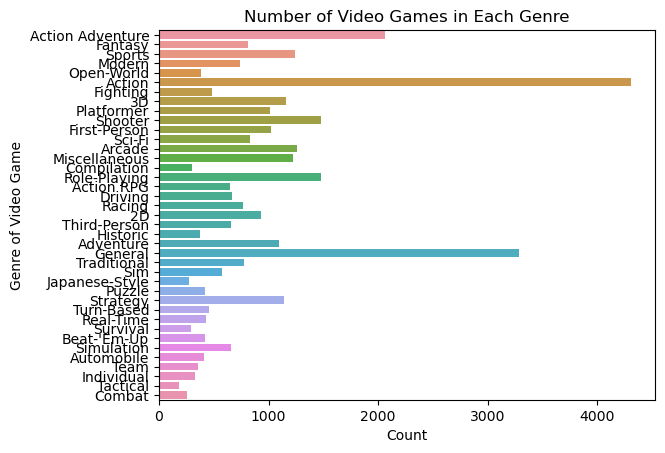

In [15]:
genre_countplot = sns.countplot(df, y='genre')
genre_countplot.set(ylabel="Genre of Video Game", xlabel="Count", title="Number of Video Games in Each Genre")


[Text(0, 0.5, 'Number of Players'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Number of Players Per Video Game')]

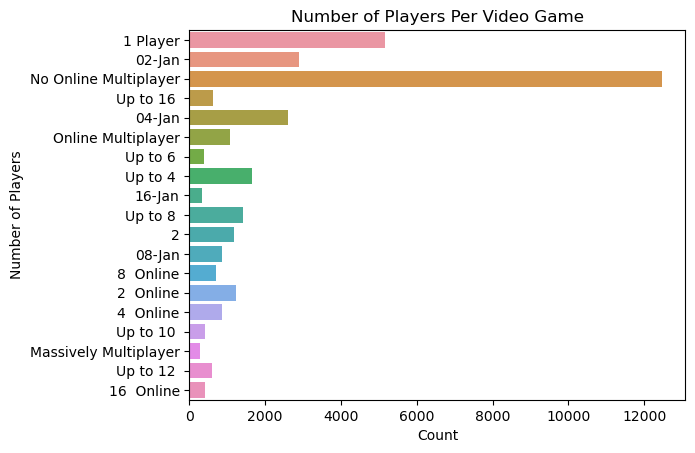

In [16]:
genre_countplot = sns.countplot(df, y='players')
genre_countplot.set(ylabel="Number of Players", xlabel="Count", title="Number of Players Per Video Game")

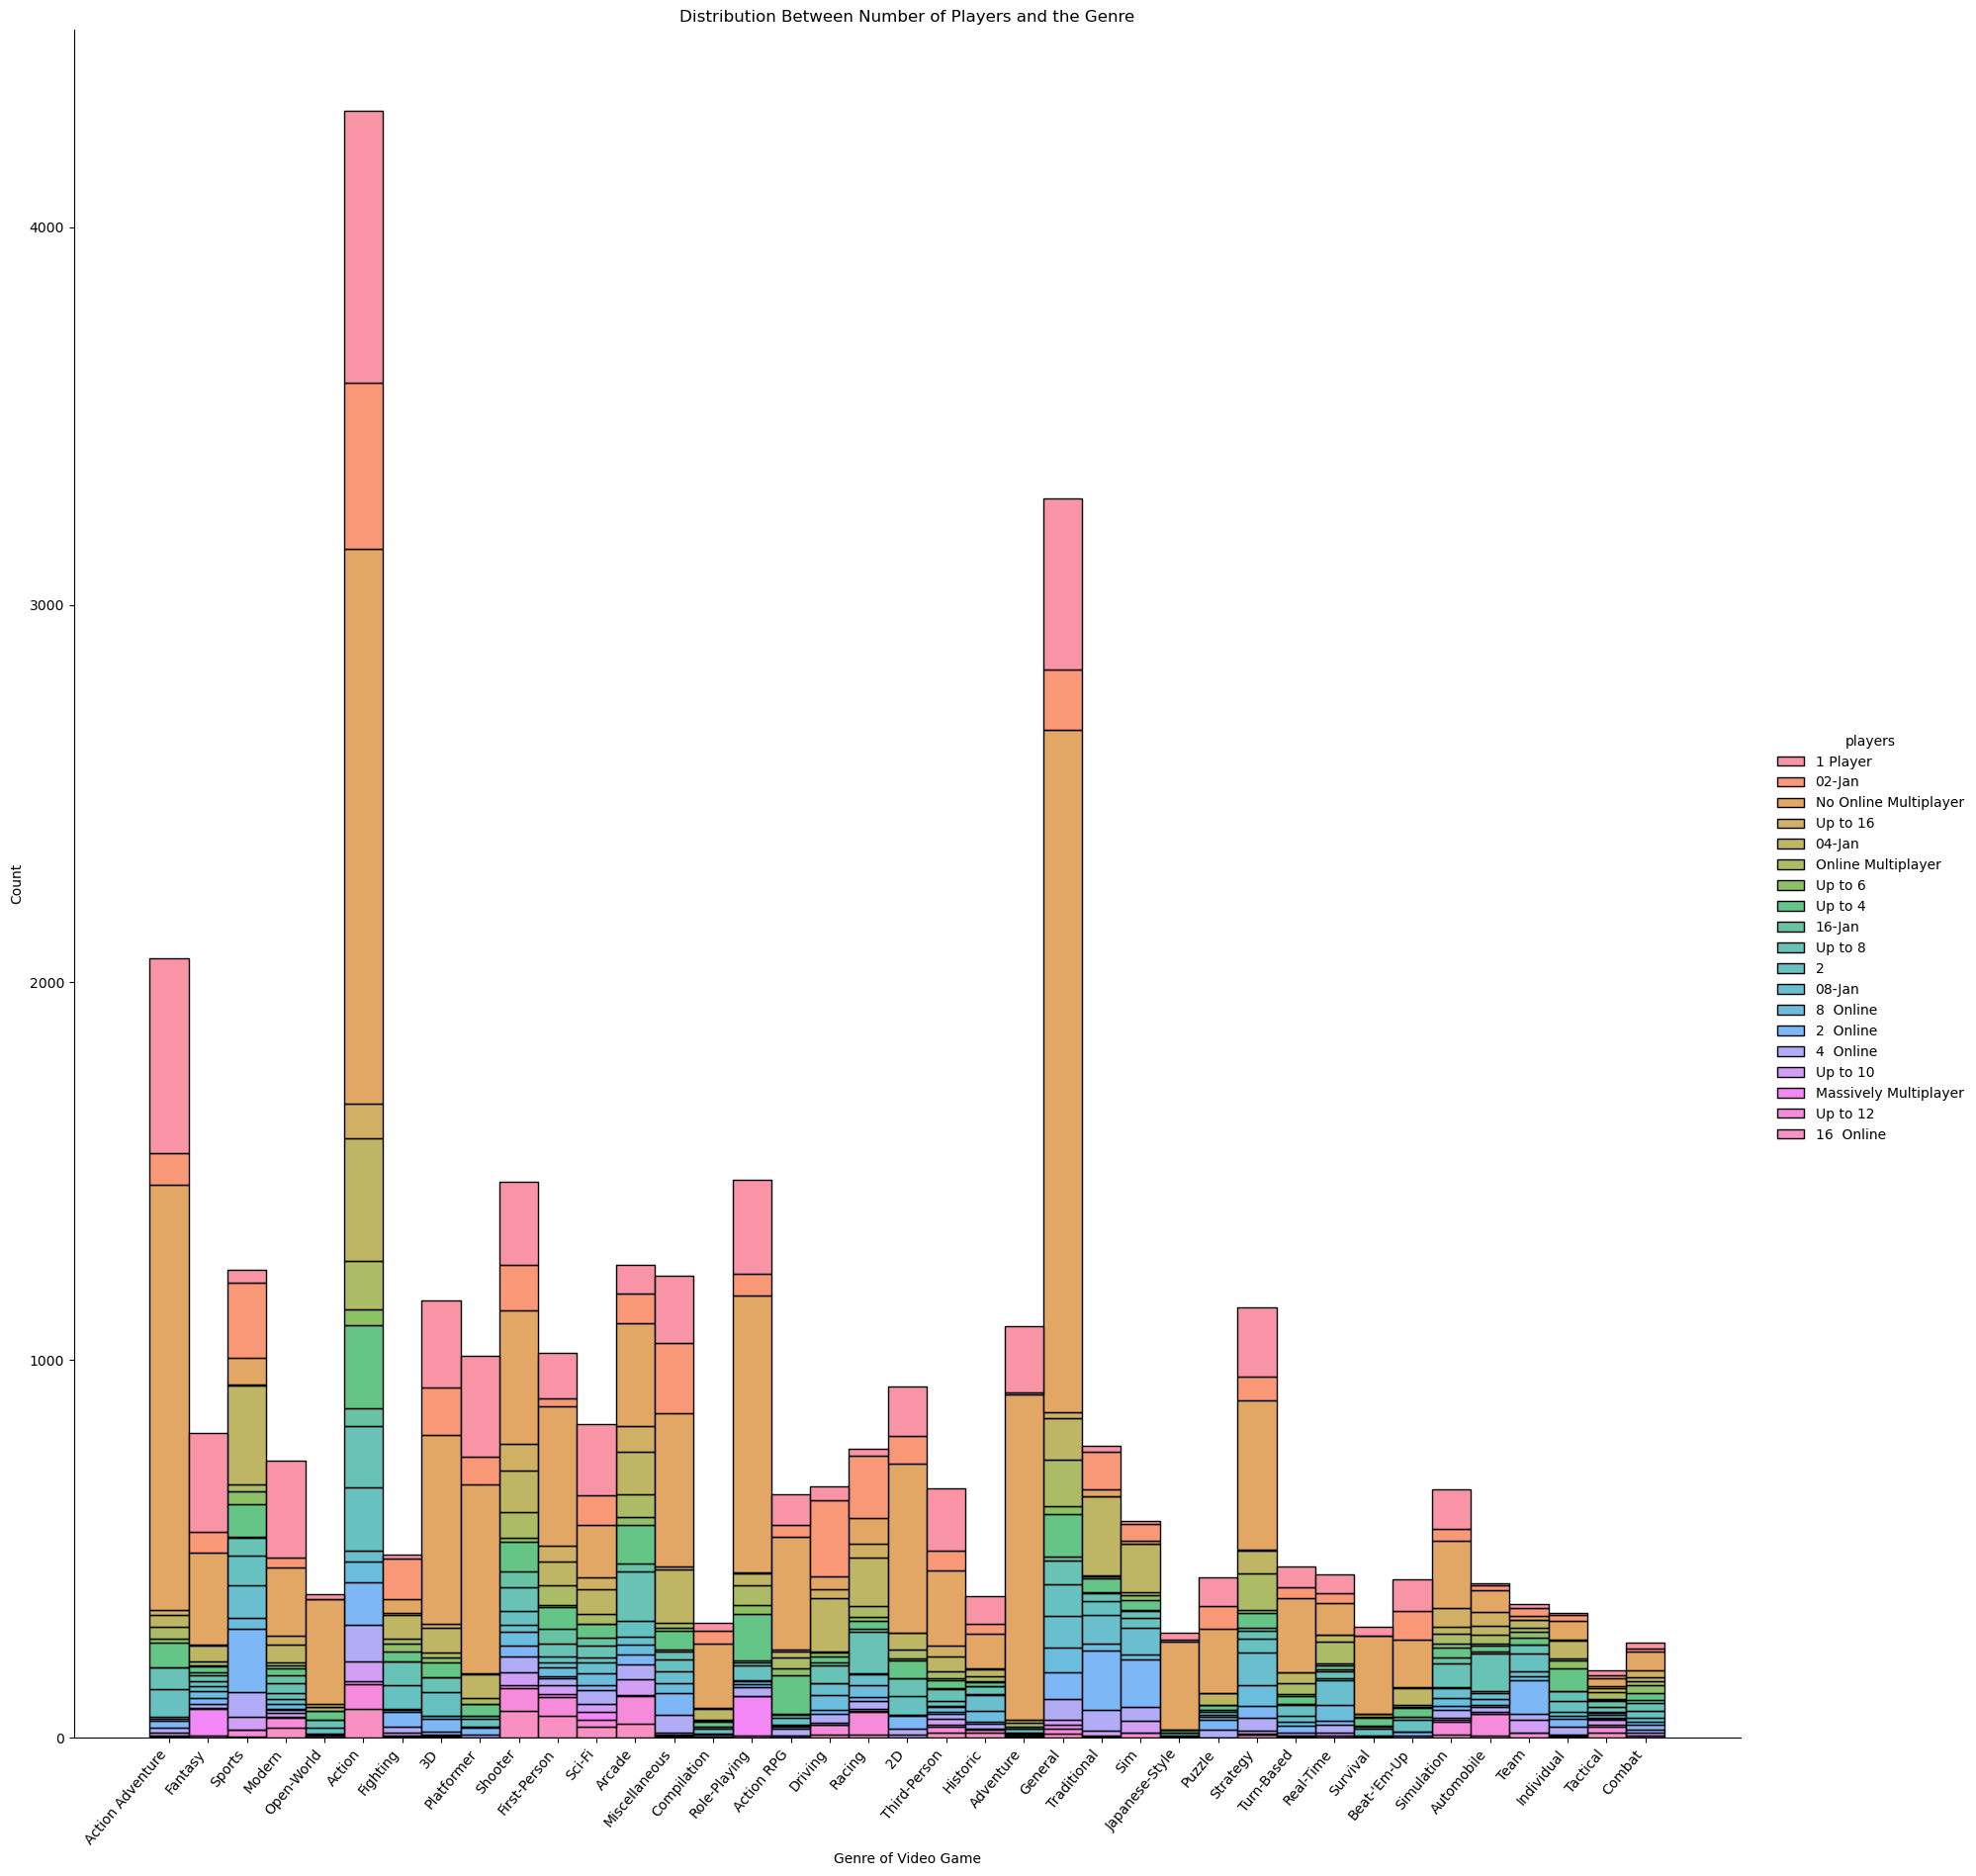

In [17]:
genres_displot = sns.displot(data=df, x=df["genre"], hue="players", height=18, aspect=1, multiple="stack")
genres_displot.set(xlabel="Genre of Video Game", ylabel="Count", title="Distribution Between Number of Players and the Genre")
genres_displot.set_xticklabels(rotation=50, ha="right")